# Study of Apartment Sale Listings

We have access to data from the Yandex.Real Estate service—an archive of apartment sale listings in St. Petersburg and neighboring areas spanning several years. Our goal is to establish parameters. This will enable the development of an automated system capable of detecting anomalies and fraudulent activities.

Two types of data are available for each apartment for sale. The first type is entered by the user, while the second type is automatically obtained based on cartographic data. For instance, this includes distances to the city center, airport, nearest park, and body of water.

## Research Objectives

In this study, we aim to identify relationships between specific factors and determine the most influential aspects on real estate pricing, including:

- 'Price' and 'Total Area'
- 'Price' and 'Living Area'
- 'Price' and 'Kitchen Area'
- 'Price' and 'Number of Rooms'
- 'Price' and 'Floor Level'
- 'Price' and 'Listing Date'
- 
We will also calculate the average cost per square meter in the ten locations with the highest number of listings. Additionally, we will determine the average price for each kilometer in St. Petersburg.

Research Process:

1. __Data Quality Assessment__: Using the data from the /datasets/real_estate_data.csv file, the first step is to assess the data quality.
2. __Data Preprocessing__: This involves correcting errors, filling in missing values, or removing anomalous data to enhance data quality.
3. __Additional Column Addition__: Create additional columns for research purposes.
4. __Data Analysis__: Analyze the data to identify patterns and relationships.
_Conclusions_: Draw conclusions based on the analysis results.

### Let's open the data file and review the general information.

Read the data from the file and place it in the 'data' dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

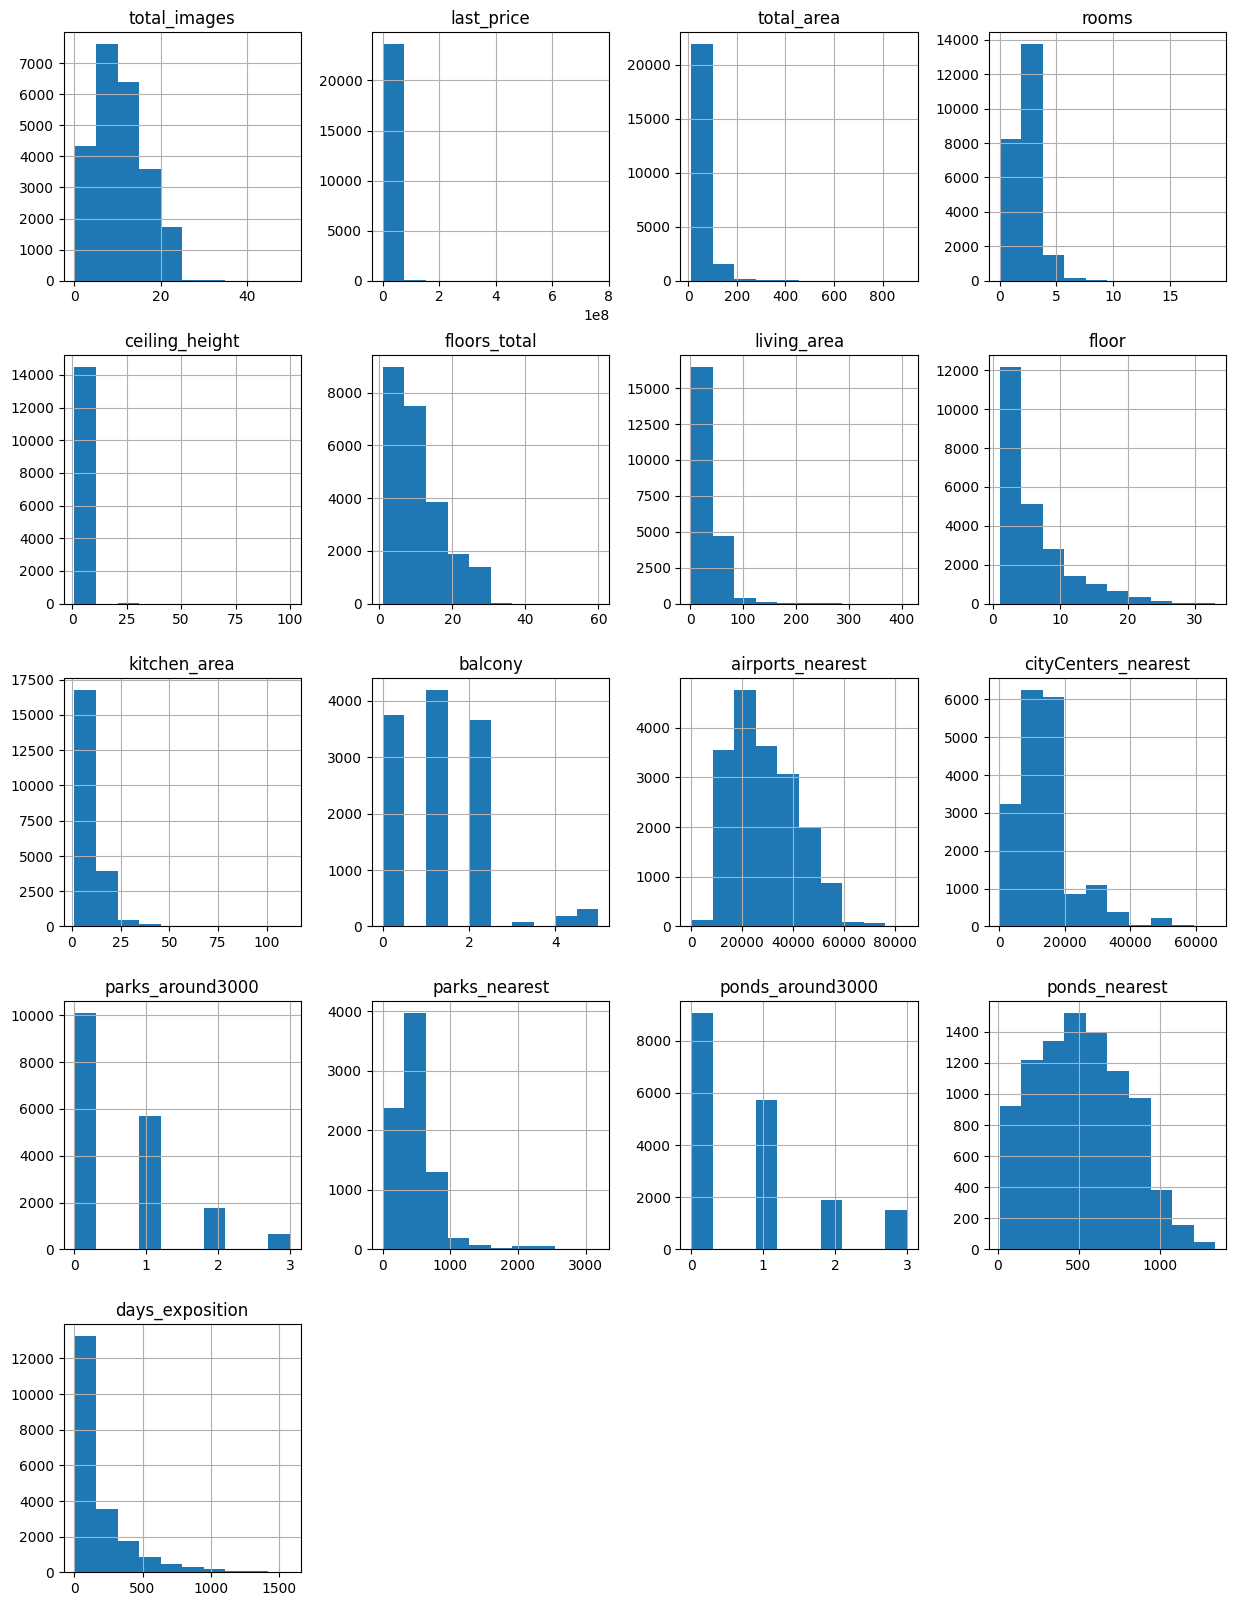

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data = pd.read_csv('/Users/daniyardjumaliev/Jupyter/Projects/datasets/real_estate_data.csv', sep='\t')
data.hist(figsize=(15, 20))
plt.show()
display(data.head(20))
data.info()

Based on the histograms obtained, we can draw initial _conclusions_:

- The first column 'total_images' does not have explicit outliers or missing values.
- 'last_price' does not have missing values, but a more detailed examination of the data is needed. The first plot suggests that the price does not show any fluctuations, likely due to the lack of detail in the graph.
- 'total_area' generally falls within average size parameters, with all values located within the range of 200 sq.m.
- 'rooms' exhibit anomalies, such as apartments with zero rooms.
- 'ceiling_height' has a significant number of missing values.
- 'living_area' has missing values, and the histogram indicates some zero values.
- 'is_apartment' has a large number of missing values, but this may be normal since the column is boolean.
- 'kitchen_area' has some missing values.
- 'balcony' has some missing values.
- 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' have a large number of missing values.
- 'days_exposition' also has some missing values.

### Data Preprocessing

Let's check the total number of missing values.

In [2]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


__________
Let's replace the missing values in the 'balcony' column with zero, as it is likely that the owner, by not explicitly stating the number of balconies, meant that there are none.

In [3]:
data['balcony'].fillna(0, inplace=True)
data['balcony'] = pd.to_numeric(data['balcony'], errors='coerce').astype('Int64')

data['balcony'].isna().sum()

0

Let's replace the missing values in the 'ceiling_height' column with median values, as such changes are unlikely to affect future conclusions and analysis. Besides, the ceiling height in multi-apartment buildings is unlikely to deviate significantly from the generally accepted norm.

In [4]:
median_ceiling_height = data['ceiling_height'].median()
data['ceiling_height'].fillna(median_ceiling_height, inplace=True)
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height']/10
data.loc[data['ceiling_height'] > 4, 'ceiling_height'] = median_ceiling_height
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = 2

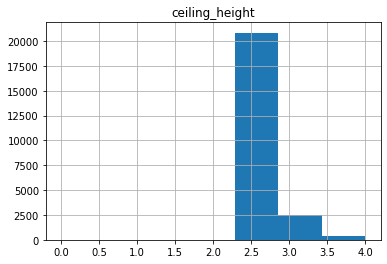

In [5]:
data['ceiling_height'].value_counts().sort_index().head(20)
data.hist('ceiling_height', bins=7, range=(0,4))
plt.show()

Now, the ceiling height has peaks around the average values (2.5-2.7m), which are the most common. The data looks reliable after processing.

Let's replace the missing values in the 'floors_total' column with a set of values: 9, 16, 24, and 35, based on the following logic. If the 'floors_total' value is missing in a row, we refer to the 'floor' column. If its value is less than 9, the building is considered 9 stories high. If it is greater than or equal to 9 but less than 16, it is considered a 16-story building. If it is greater than or equal to 16 but less than 24, it is considered a 24-story building. If it is 24 or higher, the building is considered 35 stories high.

In [4]:
def replace_floor_total(row):
    floor = row['floor']
    if pd.notnull(row['floors_total']):
        return row['floors_total']
    elif floor <= 9:
        return 9
    elif floor <= 16:
        return 16
    elif floor > 16:
        if floor > 24:
            return 35
        else:
            return 24

data['floors_total'] = data.apply(replace_floor_total, axis=1)

data['floors_total'] = data['floors_total'].astype('Int64')

data['floors_total'].isna().sum()

0

To replace missing values in the 'living_area' column, we can use available values where there are entries in the 'total_area' column. Then, we'll calculate the median ratio between living area and total area (living_area/total_area) and replace each missing value in 'living_area' with 'total_area' multiplied by the median ratio.

In [7]:
median_ratio = (data['living_area'] / data['total_area']).median()
data['living_area'].fillna(data['total_area']*median_ratio, inplace=True)

To replace NaN values in the 'is_apartment' column, first, we need to determine how many actual True and False values we have.

In [5]:
data['is_apartment'].value_counts()
#There are only 50 apartments from table with 20 000+ values so we can replace all NaN values with False, 
#because we are unable to know what is it - only 50 apartment type or this is filling errors.
data['is_apartment'].fillna(False, inplace=True)

In the 'locality_name' column, there are 49 entries without specified locations, and we will remove them as we cannot recover information in these cases. To ensure there are no implicit duplicates, let's remove all mentions of words like "поселок" (settlement), "село" (village), "деревня" (village), etc., as they may lead to duplicate records and can distort our research results.

In [9]:
data.dropna(subset=['locality_name'], inplace=True)
data['locality_name'].duplicated().sum()
data['locality_name'].unique()

data['locality_name'] = data['locality_name'].replace('поселок', '', regex=True).str.strip()
data['locality_name'] = data['locality_name'].replace('село', '', regex=True).str.strip()
data['locality_name'] = data['locality_name'].replace('коттеджный поселок', '', regex=True).str.strip()
data['locality_name'] = data['locality_name'].replace('садовое товарищество', '', regex=True).str.strip()
data['locality_name'] = data['locality_name'].replace('городского типа', '', regex=True).str.strip()
data['locality_name'] = data['locality_name'].replace('городской', '', regex=True).str.strip()
data['locality_name'] = data['locality_name'].replace('деревня', '', regex=True).str.strip()
data['locality_name'] = data['locality_name'].replace('посёлок', '', regex=True).str.strip()
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

For convenience and uniformity, let's convert the values in all columns with distances from meters to kilometers. Specifically, we'll convert the values in the 'airport_nearest' column from meters to kilometers.

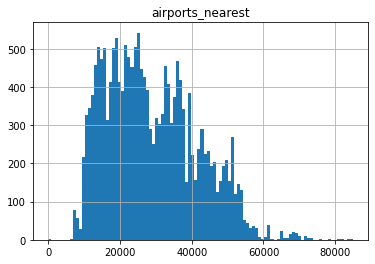

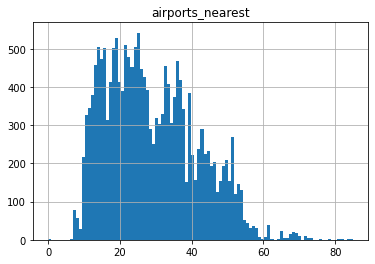

In [10]:
data.hist('airports_nearest',bins=100)
plt.show()
data['airports_nearest'] = (data['airports_nearest'] / 1000)
data.hist('airports_nearest',bins=100)
plt.show()

For convenience and uniformity, let's convert the values in all columns with distances from meters to kilometers. Specifically, we'll convert the values in the 'cityCenters_nearest' column from meters to kilometers.

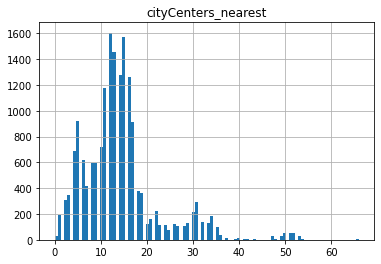

In [11]:
data['cityCenters_nearest'] = (data['cityCenters_nearest'] / 1000).round()
data.hist('cityCenters_nearest', bins=100)
plt.show()

For convenience and uniformity, let's convert the values in all columns with distances from meters to kilometers. Specifically, we'll convert the values in the 'parks_nearest' column from meters to kilometers.

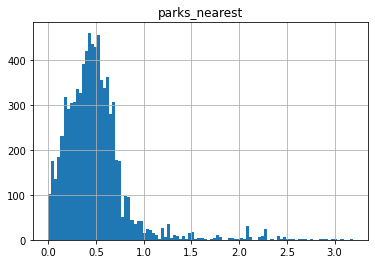

In [12]:
data['parks_nearest'] = (data['parks_nearest'] / 1000)
data.hist('parks_nearest', bins=100)
plt.show()

For convenience and uniformity, let's convert the values in all columns with distances from meters to kilometers. Specifically, we'll convert the values in the 'ponds_nearest' column from meters to kilometers.

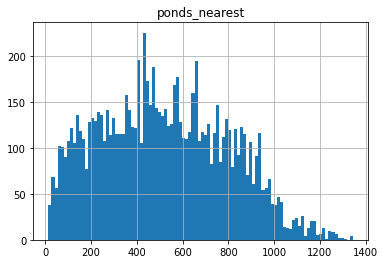

In [13]:
data.hist('ponds_nearest', bins=100)
plt.show()

_Intermediate Conclusion_: In all cases, we observe a normal Poisson distribution, so we can use these values for analysis.

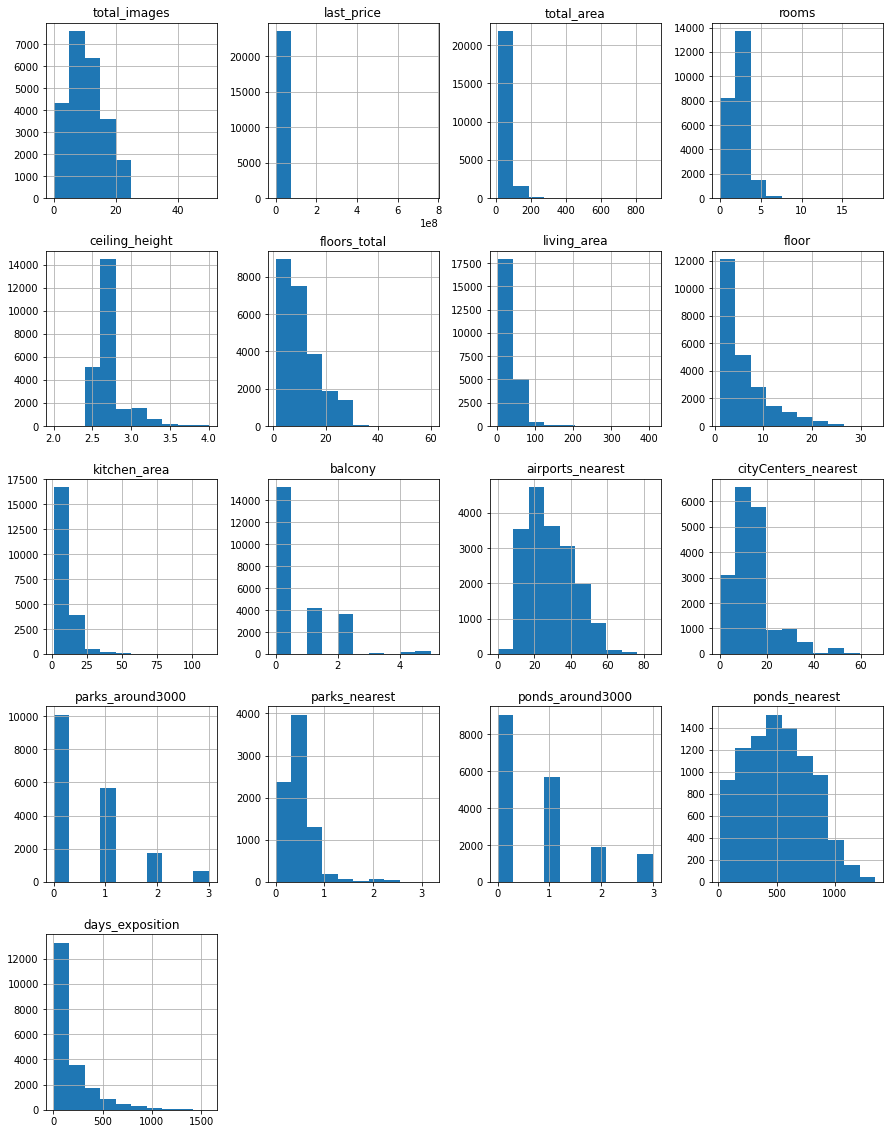

In [14]:
data.hist(figsize=(15, 20))
plt.show()

In the 'rooms' column, there are zero values.

In [15]:
data['rooms'].value_counts()

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [16]:
data.sort_values(by='rooms').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12130,4,2360000.0,23.50,2017-04-08T00:00:00,0,2.65,25,16.600000,22,False,...,NaN,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,331.0
19477,11,2300000.0,20.00,2017-11-10T00:00:00,0,2.65,10,16.000000,1,False,...,NaN,0,Санкт-Петербург,29.791,13.0,0.0,NaN,1.0,815.0,35.0
10008,20,5050000.0,44.20,2017-09-14T00:00:00,0,2.70,9,32.200000,1,False,...,NaN,0,Санкт-Петербург,24.329,6.0,0.0,NaN,2.0,520.0,69.0
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,2.65,18,14.821143,8,False,...,NaN,1,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
7237,8,2999000.0,42.63,2017-11-27T00:00:00,0,2.65,16,25.700000,2,False,...,NaN,2,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
10416,8,3700000.0,29.10,2018-08-28T00:00:00,0,2.60,14,20.500000,2,False,...,NaN,0,Санкт-Петербург,42.068,10.0,1.0,0.637,0.0,NaN,37.0
15606,4,3499000.0,25.00,2019-04-05T00:00:00,0,2.80,14,17.000000,13,False,...,NaN,2,Санкт-Петербург,43.427,16.0,1.0,0.529,0.0,NaN,NaN
20254,5,3200000.0,23.60,2018-07-13T00:00:00,0,3.10,4,17.000000,1,False,...,NaN,0,Санкт-Петербург,22.807,2.0,0.0,NaN,0.0,NaN,67.0
18028,11,3500000.0,31.00,2019-04-17T00:00:00,0,2.65,25,17.603657,2,False,...,NaN,0,Санкт-Петербург,21.460,17.0,0.0,NaN,1.0,170.0,NaN
19154,8,2500000.0,23.80,2018-02-26T00:00:00,0,2.70,11,18.800000,10,False,...,NaN,1,Отрадное,NaN,NaN,NaN,NaN,NaN,NaN,74.0


Looks like another error because in these 197 rows where the number of rooms is zero, we see different values in other columns. We should remove these rows since it's not possible to restore such data.

In [17]:
data = data[data['rooms'] != 0]
data.sort_values(by='rooms').head(20)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23453 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23453 non-null  int64  
 1   last_price            23453 non-null  float64
 2   total_area            23453 non-null  float64
 3   first_day_exposition  23453 non-null  object 
 4   rooms                 23453 non-null  int64  
 5   ceiling_height        23453 non-null  float64
 6   floors_total          23453 non-null  Int64  
 7   living_area           23453 non-null  float64
 8   floor                 23453 non-null  int64  
 9   is_apartment          23453 non-null  bool   
 10  studio                23453 non-null  bool   
 11  open_plan             23453 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23453 non-null  Int64  
 14  locality_name         23453 non-null  object 
 15  airports_nearest   

In the 'kitchen_area' column, we have only 2278 values, which is 9% of the total number of values. Therefore, we do not delete these rows but replace them with the median value of the ratio to the total_area.

In [18]:
median_kitchen_to_living = (data['kitchen_area'] / data['total_area']).median()
data['kitchen_area'].fillna(data['total_area']*median_kitchen_to_living, inplace=True)

In the 'days_exposition' column, we have 3181 missing values (NaN). We have no way to recover these values, so we must leave them unchanged. Deleting such a large number of values could lead to unforeseen distortions.

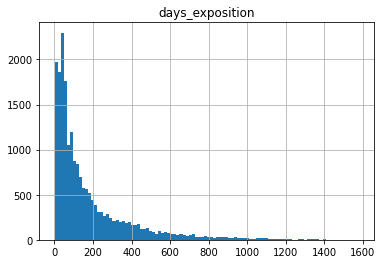

In [19]:
data.hist('days_exposition', bins=100)
plt.show()

Let's convert all cells to the corresponding data types:

- 'first_day_exposition' to the 'date' type since it represents a date.
- 'floors_total' to the 'int' type since all values in this column are natural numbers.
- 'is_apartment' to the 'bool' type as we already have two other columns with the 'bool' type.
- 'last_price' to the 'int' type because we don't need decimal values in this column, and the 'int' type consumes less memory.

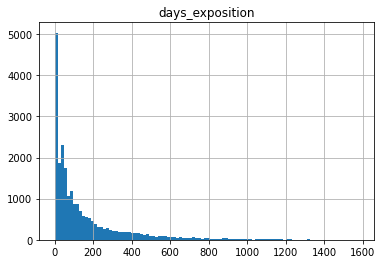

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23453 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23453 non-null  int64         
 1   last_price            23453 non-null  Int64         
 2   total_area            23453 non-null  float64       
 3   first_day_exposition  23453 non-null  datetime64[ns]
 4   rooms                 23453 non-null  int64         
 5   ceiling_height        23453 non-null  float64       
 6   floors_total          23453 non-null  Int64         
 7   living_area           23453 non-null  float64       
 8   floor                 23453 non-null  int64         
 9   is_apartment          23453 non-null  bool          
 10  studio                23453 non-null  bool          
 11  open_plan             23453 non-null  bool          
 12  kitchen_area          23453 non-null  float64       
 13  balcony         

In [20]:
#convert first_day_exposition to date format
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['first_day_exposition'].head()

#convert floors_total from float to int
data['floors_total'] = pd.to_numeric(data['floors_total'], errors='coerce').astype('Int64')

#convert is_apartment to bool value
data['is_apartment'] = data['is_apartment'].astype(bool)

#convert days_exposition to int value
data['days_exposition'].fillna(0, inplace=True)
data['days_exposition'] = np.round(data['days_exposition']).astype(np.int64)
data.hist('days_exposition', bins=100)
plt.show()

#convert last_price to int value
data['last_price'] = pd.to_numeric(data['last_price'], errors='coerce').astype('Int64')
data.info()

_______________________
Let's check the final edits.

In [21]:
print(data.info())
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23453 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23453 non-null  int64         
 1   last_price            23453 non-null  Int64         
 2   total_area            23453 non-null  float64       
 3   first_day_exposition  23453 non-null  datetime64[ns]
 4   rooms                 23453 non-null  int64         
 5   ceiling_height        23453 non-null  float64       
 6   floors_total          23453 non-null  Int64         
 7   living_area           23453 non-null  float64       
 8   floor                 23453 non-null  int64         
 9   is_apartment          23453 non-null  bool          
 10  studio                23453 non-null  bool          
 11  open_plan             23453 non-null  bool          
 12  kitchen_area          23453 non-null  float64       
 13  balcony         

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,0.000000


__________
I assume there is no need to fill in cells from 'airports_nearest' to 'ponds_nearest' since these values may impact the final results of our study.

At the end of the data preprocessing, it is necessary to validate the values.

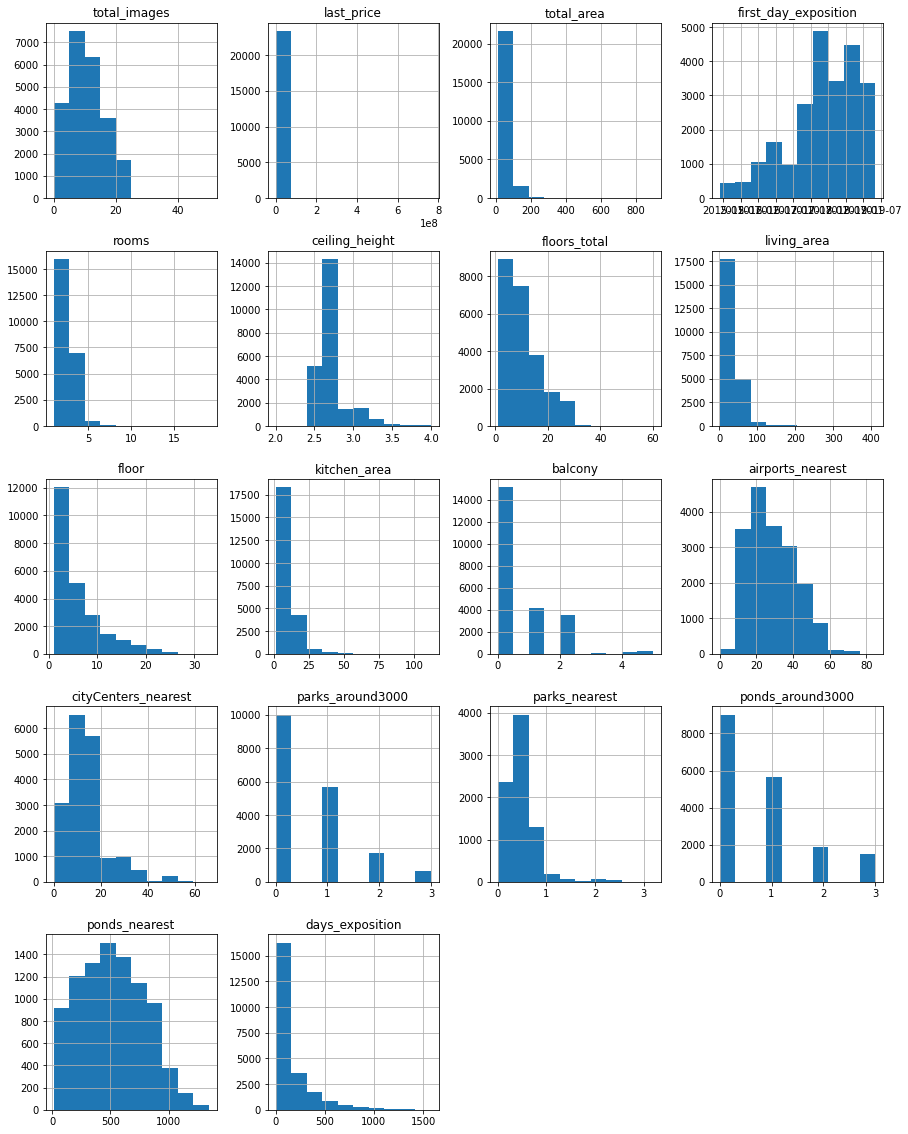

In [22]:
data.hist(figsize=(15, 20))
plt.show()

Let's check the data for outliers and explicit duplicates.

In [6]:
data.duplicated().sum()

0

There are no explicit duplicates.

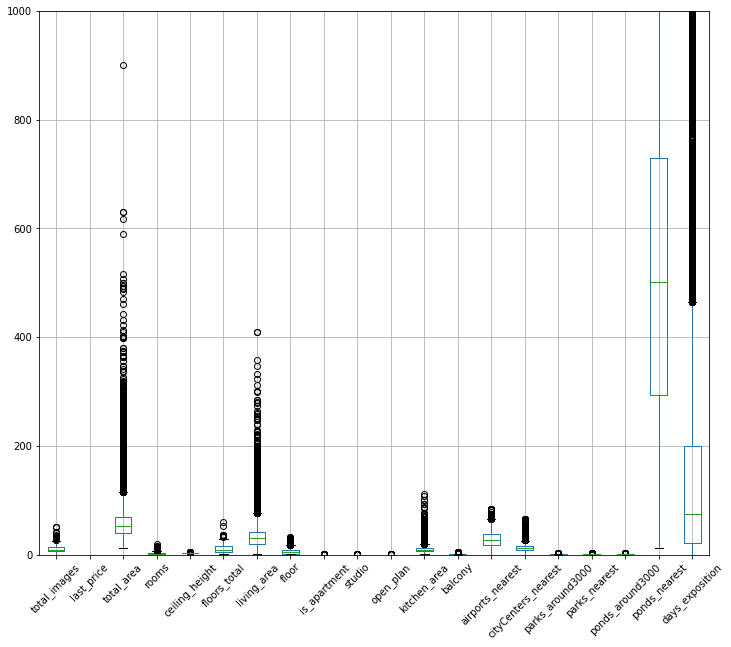

In [24]:
plt.figure(figsize=(12, 10))
data.boxplot()
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.show()

The reason for some empty cells in geographic values (such as airports_nearest, cityCenters_nearest, etc.) is associated with errors and other issues during data transmission. The reason why some columns filled in by sellers are also empty is due to human error or, in some cases, insufficient data to fill them.

__Conclusion__: The data with areas have obvious outliers, but firstly, these data should exhibit a strong variability since such data logically should be heterogeneous. There is some correlation observed among all data of the 'area' type, indicating a normal distribution of data in general.

The data with distances also have strong outliers, but within logical bounds. Since the table contains data from different areas of St. Petersburg and its surroundings, distances to specified points are expected to vary significantly.

Therefore, we leave these data unchanged. The data quality should allow us to perform all necessary calculations and draw conclusions close to the actual situation.

### Calculate and add new columns to the table.

Let's add a new column 'square_price' where we'll display the price per square meter of the area. We'll convert it to int right away.

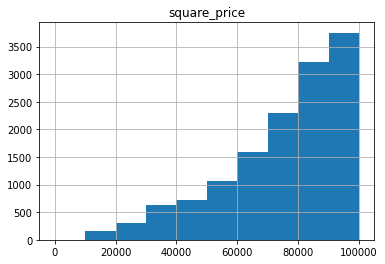

In [25]:
data['square_price'] = data['last_price'] / data['total_area']
data['square_price'] = pd.to_numeric(data['square_price'], errors='coerce').astype('Int64')
data.hist('square_price', bins=10, range=(0,100000))
plt.show()

Let's add a new columns 'posted_day', 'posted_month', 'posted_year' where we'll display the day, the month and the year when the ad was created.

In [26]:
data['posted_day'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,posted_day
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,Санкт-Петербург,18.863,16.0,1.0,0.482,2.0,755.0,0,120370,3
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,Шушары,12.817,19.0,0.0,NaN,0.0,NaN,81,82920,1
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,Санкт-Петербург,21.741,14.0,1.0,0.090,2.0,574.0,558,92785,3
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.289724,9,False,...,Санкт-Петербург,28.098,7.0,2.0,0.084,3.0,234.0,424,408176,4
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,Санкт-Петербург,31.856,8.0,2.0,0.112,1.0,48.0,121,100000,1


In [27]:
data['posted_month'] = pd.DatetimeIndex(data['first_day_exposition']).month 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,posted_day,posted_month
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,18.863,16.0,1.0,0.482,2.0,755.0,0,120370,3,3
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,12.817,19.0,0.0,NaN,0.0,NaN,81,82920,1,12
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,21.741,14.0,1.0,0.090,2.0,574.0,558,92785,3,8
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.289724,9,False,...,28.098,7.0,2.0,0.084,3.0,234.0,424,408176,4,7
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,31.856,8.0,2.0,0.112,1.0,48.0,121,100000,1,6


In [28]:
data['posted_year'] = pd.DatetimeIndex(data['first_day_exposition']).year 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,posted_day,posted_month,posted_year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,16.0,1.0,0.482,2.0,755.0,0,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,19.0,0.0,NaN,0.0,NaN,81,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,14.0,1.0,0.090,2.0,574.0,558,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.289724,9,False,...,7.0,2.0,0.084,3.0,234.0,424,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,8.0,2.0,0.112,1.0,48.0,121,100000,1,6,2018


Let's add a new column 'first_last_other' that groups all apartments by the first, last, or other floor.

In [29]:
def floor_func(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'first'
    elif floor == floors_total:
        return 'last'
    else:
        return 'other'

data['first_last_other'] = data.apply(floor_func, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,posted_day,posted_month,posted_year,first_last_other
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,1.0,0.482,2.0,755.0,0,120370,3,3,2019,other
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0.0,NaN,0.0,NaN,81,82920,1,12,2018,first
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,1.0,0.090,2.0,574.0,558,92785,3,8,2015,other
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.289724,9,False,...,2.0,0.084,3.0,234.0,424,408176,4,7,2015,other
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,2.0,0.112,1.0,48.0,121,100000,1,6,2018,other


### Let's conduct exploratory data analysis.

__Checking the total area.__

In [30]:
data['total_area'].describe()
sorted_total = data.sort_values(by='total_area', ascending=True)
sorted_total.tail(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,posted_day,posted_month,posted_year,first_last_other
14991,19,45000000,413.50,2018-09-20,7,2.65,20,74.200000,18,False,...,0.0,NaN,0.0,NaN,182,108827,3,9,2018,other
22131,14,27000000,422.20,2018-10-18,5,2.70,13,239.750449,11,False,...,0.0,NaN,0.0,NaN,0,63950,3,10,2018,other
21955,19,130000000,431.00,2017-10-02,7,3.70,8,220.000000,5,False,...,NaN,NaN,NaN,NaN,161,301624,0,10,2017,other
3676,12,28789000,441.98,2019-01-23,4,2.65,6,250.982718,6,False,...,0.0,NaN,0.0,NaN,0,65136,2,1,2019,last
20273,12,20000000,460.80,2019-03-20,6,3.10,3,279.600000,1,False,...,1.0,0.852,3.0,122.0,21,43402,2,3,2019,first
6221,8,34000000,470.30,2018-01-14,4,2.65,3,248.700000,3,False,...,1.0,0.852,3.0,122.0,179,72294,6,1,2018,last
660,3,49950000,483.90,2017-10-04,7,3.20,6,312.500000,4,False,...,3.0,0.461,3.0,22.0,391,103223,2,10,2017,other
6621,20,99000000,488.00,2017-04-09,5,2.95,20,216.000000,17,False,...,1.0,0.646,1.0,368.0,351,202868,6,4,2017,other
22494,7,91075000,491.00,2017-05-27,5,2.65,9,274.000000,9,False,...,2.0,0.116,0.0,NaN,115,185488,5,5,2017,last
9826,1,43185328,494.10,2017-05-12,1,2.85,12,280.579576,3,False,...,1.0,0.592,0.0,NaN,5,87401,4,5,2017,other


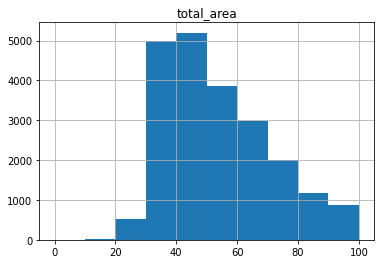

In [31]:
data.hist('total_area', bins=10, range=(0,100))
plt.show()

Everything looks good, except for the apartment with a total area of 900 square meters. However, it also has the highest price and 12 rooms. Let's assume it's not an error and leave it as is.

__Checking the living area.__

In [32]:
sorted_total = data.sort_values(by='living_area', ascending=True)
sorted_total.head(20)
#data['living_area'].describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,posted_day,posted_month,posted_year,first_last_other
13915,20,6350000,52.0,2018-02-06,2,3.00,6,2.000000,2,False,...,0.0,NaN,1.0,1012.0,91,122115,1,2,2018,other
3242,7,4440000,41.0,2017-07-02,1,2.65,17,3.000000,17,False,...,0.0,NaN,0.0,NaN,216,108292,6,7,2017,last
23574,14,64990000,139.0,2015-11-24,3,3.00,8,3.000000,8,False,...,1.0,0.630,3.0,100.0,280,467553,1,11,2015,last
21943,15,6100000,77.6,2019-02-28,4,2.50,9,5.400000,1,False,...,1.0,0.584,0.0,NaN,33,78608,3,2,2019,first
16431,13,3799000,31.0,2018-04-12,1,2.60,5,6.000000,1,False,...,1.0,0.430,0.0,NaN,168,122548,3,4,2018,first
19251,19,4050000,33.0,2018-10-15,1,2.50,22,6.500000,21,False,...,1.0,0.458,0.0,NaN,44,122727,0,10,2018,other
17961,3,1400000,13.0,2017-12-03,1,2.60,9,7.382179,1,False,...,0.0,NaN,1.0,185.0,410,107692,6,12,2017,first
19546,3,1850000,13.0,2019-03-11,1,3.40,5,7.382179,2,False,...,1.0,0.644,0.0,NaN,24,142307,0,3,2019,other
19558,2,1686000,13.2,2018-12-17,1,2.65,5,7.495751,1,False,...,1.0,0.361,1.0,155.0,19,127727,0,12,2018,first
20994,7,8900000,50.6,2018-10-22,2,2.50,7,8.000000,3,False,...,1.0,0.173,3.0,126.0,0,175889,0,10,2018,other


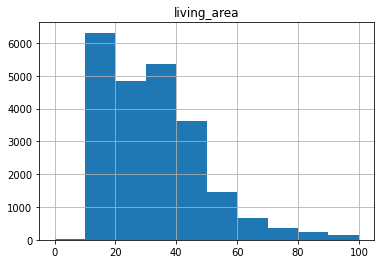

In [33]:
data.hist('living_area', bins=10, range=(0,100))
plt.show()

After sorting, we found a few errors: the first eight rows have 'living_area' values that are too small. The total area and price suggest that they cannot be this small. However, if we assume that 'living_area' includes only bedrooms and living rooms, and there are very few such values, we can leave them unchanged.

__________
__Checking the kitchen area.__

In [34]:
data['kitchen_area'].describe()

count    23453.000000
mean        10.533745
std          6.017176
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

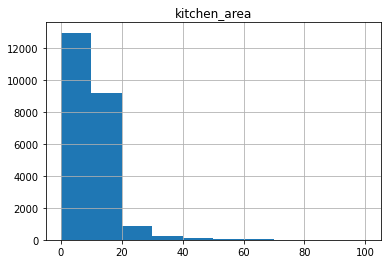

In [35]:
data.hist('kitchen_area', bins=10, range=(0,100))
plt.show()

There are no explicit outliers, and all values are within the normal distribution range.

___________
__Checking the price.__

In [36]:
data['last_price'].describe()

count    2.345300e+04
mean     6.568035e+06
std      1.092836e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

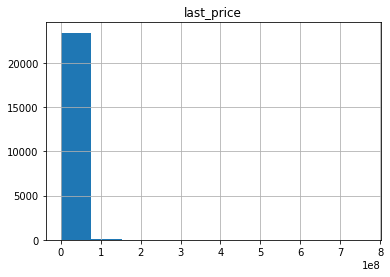

In [37]:
data.hist('last_price', bins=10)

__Checking the quantity of rooms.__

In [38]:
data['rooms'].describe()

count    23453.000000
mean         2.087494
std          1.066253
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

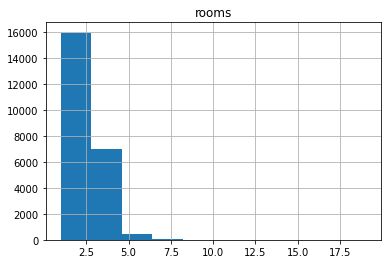

In [39]:
data.hist('rooms', bins=10)
plt.show()

__Checking the ceiling height.__

In [40]:
data['ceiling_height'].describe()

count    23453.000000
mean         2.692880
std          0.205109
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

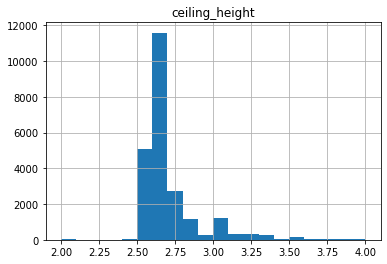

In [41]:
data.hist('ceiling_height', bins=20)
plt.show()

After filling in and replacing values, we have achieved a normal distribution.

__Checking the floors.__

In [42]:
data['floor'].describe()

count    23453.000000
mean         5.870720
std          4.863671
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

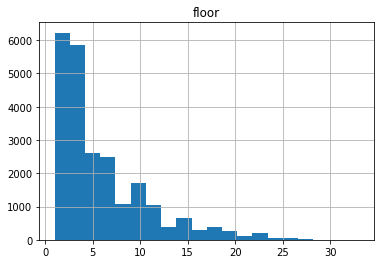

In [43]:
data.hist('floor', bins=20)
plt.show()

__Checking the data in the 'First, last, other' column.__

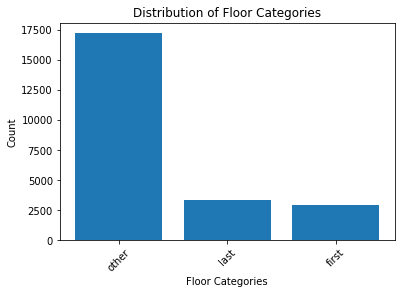

In [44]:
value_counts = data['first_last_other'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Floor Categories')
plt.ylabel('Count')
plt.title('Distribution of Floor Categories')
plt.xticks(rotation=45)
plt.show()

__Checking the floors_total__

In [45]:
data['floors_total'].describe()

count    23453.000000
mean        10.634802
std          6.568020
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [46]:
data.sort_values(by='floors_total').tail(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,posted_day,posted_month,posted_year,first_last_other
22946,14,7690000,75.0,2018-03-27,2,2.65,35,40.0,8,False,...,0.0,NaN,3.0,80.0,0,102533,1,3,2018,other
2966,9,4300000,37.0,2017-08-08,1,2.65,35,14.0,15,False,...,0.0,NaN,3.0,80.0,50,116216,1,8,2017,other
20938,18,9900000,100.9,2019-04-08,3,2.65,35,53.4,22,False,...,0.0,NaN,3.0,80.0,0,98116,0,4,2019,other
9370,12,7390000,70.0,2017-02-21,2,2.70,35,28.0,3,False,...,0.0,NaN,3.0,80.0,236,105571,1,2,2017,other
7236,10,4599000,42.0,2019-01-10,1,2.65,35,15.0,12,False,...,0.0,NaN,3.0,80.0,72,109500,3,1,2019,other
18629,20,5700000,54.0,2017-12-08,1,2.65,35,21.0,31,False,...,0.0,NaN,3.0,80.0,128,105555,4,12,2017,other
12960,20,6140000,54.0,2018-10-09,2,2.70,35,26.6,13,False,...,0.0,NaN,3.0,80.0,155,113703,1,10,2018,other
871,14,7777777,75.0,2017-11-16,2,2.65,35,40.5,23,False,...,0.0,NaN,3.0,80.0,169,103703,3,11,2017,other
21809,20,10600000,77.0,2019-04-16,2,2.65,35,39.0,11,False,...,0.0,NaN,3.0,80.0,0,137662,1,4,2019,other
12888,7,7600000,70.0,2016-11-18,3,2.70,35,36.5,27,False,...,0.0,NaN,3.0,80.0,413,108571,4,11,2016,other


It seems we have another error in the 'floors_total' column. According to the data, several buildings have more than 45 floors. However, according to information from Google, 45 floors is the height of the tallest building in St. Petersburg. Therefore, we should delete all rows where the number of floors exceeds 45.

In [7]:
data = data[data['floors_total'] < 45]
data.sort_values(by='floors_total').tail(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4855,12,5500000.0,50.0,2017-06-22T00:00:00,1,2.80,35,22.0,4,False,...,13.00,NaN,Санкт-Петербург,18627.0,20339.0,1.0,609.0,3.0,145.0,537.0
13975,19,6990000.0,65.0,2018-10-06T00:00:00,2,NaN,35,32.1,23,False,...,8.90,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,89.0
20938,18,9900000.0,100.9,2019-04-08T00:00:00,3,NaN,35,53.4,22,False,...,13.40,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
18629,20,5700000.0,54.0,2017-12-08T00:00:00,1,NaN,35,21.0,31,False,...,18.00,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,128.0
871,14,7777777.0,75.0,2017-11-16T00:00:00,2,NaN,35,40.5,23,False,...,11.70,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,169.0
21809,20,10600000.0,77.0,2019-04-16T00:00:00,2,NaN,35,39.0,11,False,...,14.00,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
18218,4,9900000.0,101.0,2018-09-27T00:00:00,3,NaN,35,53.4,33,False,...,13.70,2.0,Санкт-Петербург,18737.0,20450.0,0.0,NaN,3.0,72.0,7.0
1917,13,10150000.0,74.0,2017-11-17T00:00:00,2,2.80,35,34.4,30,False,...,13.00,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
5749,20,3590000.0,25.0,2017-08-30T00:00:00,0,2.80,35,NaN,26,False,...,NaN,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,198.0
18617,8,7350000.0,68.5,2017-10-09T00:00:00,2,NaN,35,27.0,3,False,...,23.00,1.0,Санкт-Петербург,18627.0,20339.0,1.0,609.0,3.0,145.0,41.0


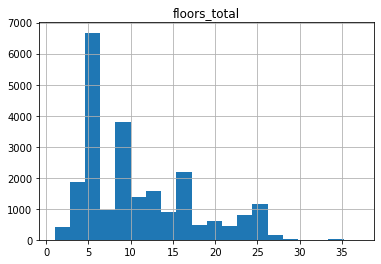

In [48]:
data.hist('floors_total', bins=20)
plt.show()

From the histogram, it is evident that there is a large number of apartments on the market located on floors from the second to the penultimate. Since, logically, there should be significantly more of them, the data appears to be quite relevant.

__Distance to the city center.__

In [49]:
data['cityCenters_nearest'].describe()

count    18019.000000
mean        14.195238
std          8.629564
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64

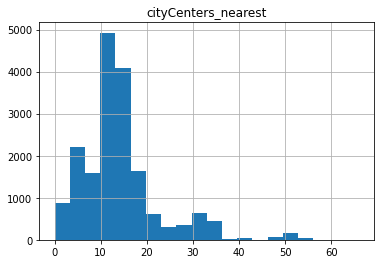

In [50]:
data.hist('cityCenters_nearest', bins=20)
plt.show()

__Airports near.__

In [51]:
data['airports_nearest'].describe()

count    17996.000000
mean        28.829618
std         12.631702
min          0.000000
25%         18.590000
50%         26.770000
75%         37.313000
max         84.869000
Name: airports_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

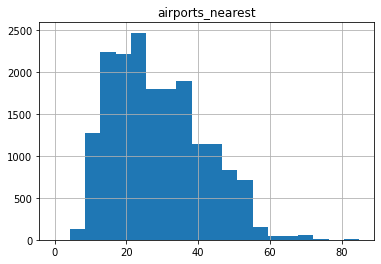

In [52]:
data.hist('airports_nearest', bins=20)

__Parks near.__

In [53]:
data['parks_nearest'].describe()

count    8033.000000
mean        0.490436
std         0.342671
min         0.001000
25%         0.287000
50%         0.453000
75%         0.612000
max         3.190000
Name: parks_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

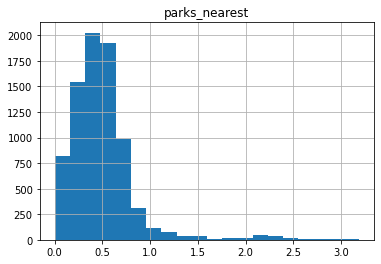

In [54]:
data.hist('parks_nearest', bins=20)

__Let's check the 'day of posting' and 'month of posting' columns.__

In [55]:
data[['posted_day', 'posted_month']].describe()

,posted_day,posted_month
count,23451.000000,23451.000000
mean,2.567566,6.395420
std,1.789828,3.490629
min,0.000000,1.000000
25%,1.000000,3.000000
50%,3.000000,6.000000
75%,4.000000,10.000000
max,6.000000,12.000000


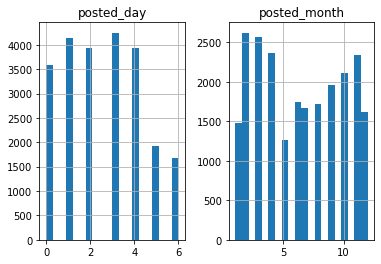

In [56]:
data.hist(['posted_day','posted_month'], bins=20)
plt.show()

__Conclusion__: All presented data indicating the distance from key points (lakes, ponds, city center, airport) fit into a normal distribution without significant outliers. Therefore, based on them, we can conduct a relevant analysis.

__Once the data is organized, we will return to the study.__

How quickly apartments are selling:

In [57]:
#firstly we need to throw all zero values.
data['days_exposition'].value_counts()
fast_sold = data[data['days_exposition'] != 0]

fast_sold_mean = fast_sold['days_exposition'].mean()
print('average value days =', fast_sold_mean)
fast_sold_median = fast_sold['days_exposition'].median()
print('median value days =',fast_sold_median)
fast_sold['days_exposition'].describe()

average value days = 181.4063100813409
median value days = 96.0


count    20285.000000
mean       181.406310
std        220.156558
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

__Conclusion__: The average time to sell an apartment is about 96 days, which is roughly equivalent to three months. It can be assumed that all sales exceeding 232 days are long-term sales, but they constitute less than 25%. All sales that occur within three months can be considered relatively quick. On average, real estate sells faster than 96 days.

Let's determine if there is a correlation between the price and the following factors:

- 'last_price' and 'total_area'
- 'last_price' and 'living_area'
- 'last_price' and 'kitchen_area'
- 'last_price' and 'rooms'
- 'last_price' and 'first_last_other'
- 'last_price' and 'date'

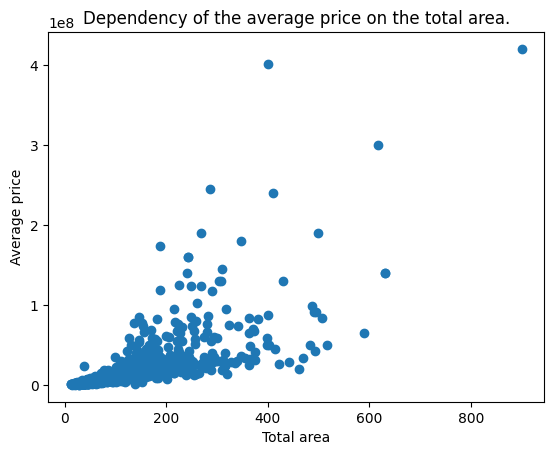

In [8]:
grouped_data_total = data.groupby('total_area')['last_price'].median().reset_index()
plt.scatter(grouped_data_total['total_area'], grouped_data_total['last_price'])
plt.xlabel('Total area')
plt.ylabel('Average price')
plt.title('Dependency of the average price on the total area.')
plt.show()

The size of the total area does not significantly affect the apartment's price.

In [59]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,posted_day,posted_month,posted_year
total_images,1.000000,0.104197,0.114382,0.095596,0.050359,0.011784,0.101367,0.033232,0.010411,-0.015826,...,-0.048004,0.021144,-0.007388,-0.010826,-0.002897,-0.057642,0.133288,-0.010995,0.005222,0.142241
last_price,0.104197,1.000000,0.653183,0.364817,0.267926,-0.003787,0.584580,0.028561,0.026883,-0.007488,...,-0.207373,0.150416,-0.016393,0.161001,-0.085729,0.052844,0.738191,0.001734,0.003242,-0.042889
total_area,0.114382,0.653183,1.000000,0.760592,0.378572,-0.067838,0.945741,-0.019863,0.029503,-0.020191,...,-0.232901,0.163295,-0.021194,0.164331,-0.099617,0.095585,0.304844,-0.004205,0.006459,-0.079277
rooms,0.095596,0.364817,0.760592,1.000000,0.250939,-0.217235,0.833059,-0.145087,-0.000327,-0.022096,...,-0.187582,0.133825,-0.052479,0.095003,-0.059295,0.076009,0.059388,-0.003111,-0.001052,-0.053588
ceiling_height,0.050359,0.267926,0.378572,0.250939,1.000000,-0.077513,0.358303,-0.044848,0.046724,-0.000207,...,-0.298957,0.228396,-0.060292,0.192885,-0.118837,0.072466,0.282048,-0.025085,-0.006223,-0.050926
floors_total,0.011784,-0.003787,-0.067838,-0.217235,-0.077513,1.000000,-0.154337,0.681124,-0.026311,0.016843,...,0.015302,-0.252280,0.095035,-0.124692,0.041301,-0.025394,0.148303,0.012894,0.014754,0.006956
living_area,0.101367,0.584580,0.945741,0.833059,0.358303,-0.154337,1.000000,-0.086304,0.028597,-0.015101,...,-0.230161,0.177855,-0.048736,0.150024,-0.085393,0.090008,0.233899,-0.003888,0.000653,-0.071553
floor,0.033232,0.028561,-0.019863,-0.145087,-0.044848,0.681124,-0.086304,1.000000,-0.013215,0.011512,...,0.007328,-0.162665,0.070884,-0.076411,0.028089,-0.021160,0.128519,0.011927,0.018664,0.005128
is_apartment,0.010411,0.026883,0.029503,-0.000327,0.046724,-0.026311,0.028597,-0.013215,1.000000,-0.001001,...,0.003507,0.020707,-0.033419,0.024151,0.003371,0.008583,0.044868,-0.009493,0.002444,0.009384
studio,-0.015826,-0.007488,-0.020191,-0.022096,-0.000207,0.016843,-0.015101,0.011512,-0.001001,1.000000,...,-0.000763,-0.004431,-0.005290,0.000546,-0.001575,-0.008350,0.000750,-0.003569,-0.008096,-0.030412


__Conclusion__: The correlation between 'last_price' and 'total_area' is 0.653183, which exceeds half, indicating that there is a connection, although not very pronounced.

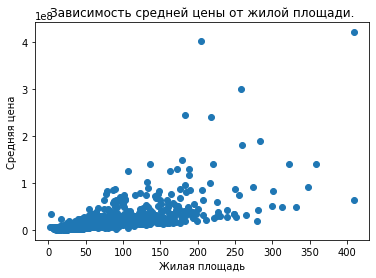

In [60]:
grouped_data_living = data.groupby('living_area')['last_price'].median().reset_index()
plt.scatter(grouped_data_living['living_area'], grouped_data_living['last_price'])
plt.xlabel('Жилая площадь')
plt.ylabel('Средняя цена')
plt.title('Зависимость средней цены от жилой площади.')
plt.show()

The size of the living area, if it has any impact on increasing the price, is very small.

__Conclusion__: The correlation between 'last_price' and 'living_area' is 0.584580, which is similar to the correlation between 'last_price' and 'total_area'. Let's continue exploring.

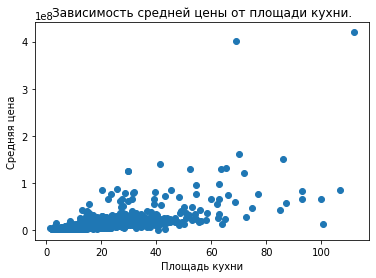

In [61]:
grouped_data_kitchen = data.groupby('kitchen_area')['last_price'].median().reset_index()
plt.scatter(grouped_data_kitchen['kitchen_area'], grouped_data_kitchen['last_price'])
plt.xlabel('Площадь кухни')
plt.ylabel('Средняя цена')
plt.title('Зависимость средней цены от площади кухни.')
plt.show()

The kitchen area also does not significantly impact the average apartment price.

__Conclusion__: The correlation between 'last_price' and 'kitchen_area' is 0.512366, which is similar to the correlation between 'last_price' and 'total_area'. Let's continue exploring.

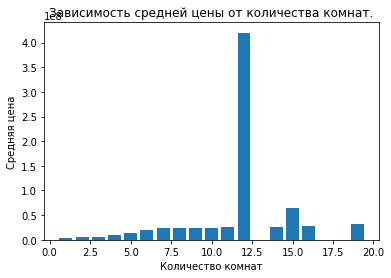

In [62]:
grouped_data_rooms = data.groupby('rooms')['last_price'].median().reset_index()
plt.bar(grouped_data_rooms['rooms'], grouped_data_rooms['last_price'])
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена')
plt.title('Зависимость средней цены от количества комнат.')
plt.show()

<AxesSubplot:xlabel='rooms'>

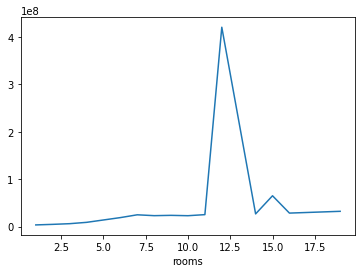

In [63]:
data.groupby('rooms')['last_price'].median().plot()

The number of rooms has little impact on the apartment price.

__Conclusion__: The correlation between 'last_price' and 'rooms' is 0.364817. From the histogram, it is evident that the number of rooms has a stronger influence on cheaper apartments, but as the price increases, this influence diminishes.

<AxesSubplot:xlabel='first_last_other'>

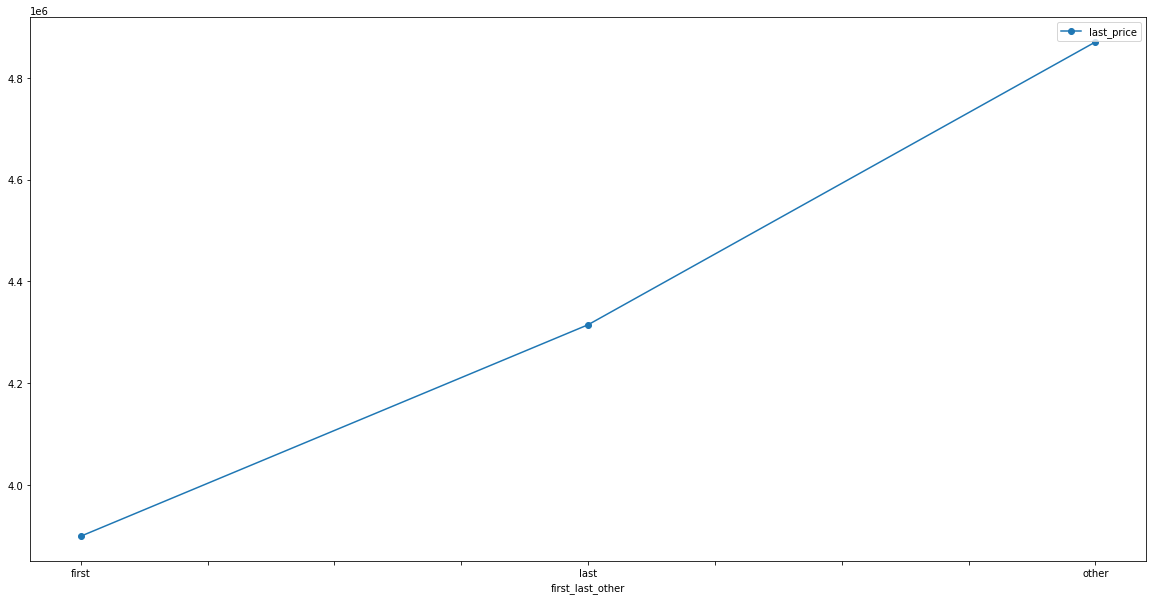

In [64]:
price_floor_type = data.pivot_table(index='first_last_other', values='last_price', aggfunc='median')
price_floor_type.plot(style='o-',figsize=(20, 10))

__Conclusion__: All floors between the first and the last sell better. However, apartments on the first floor are the least demanded in this group.

__MAIN CONCLUSION__: The total area, living area, kitchen area, number of rooms, and the floor of the apartment may not have a very strong influence on the price. Although it is worth noting that:

- 'last_price' and 'total_area' (total area) - there is a positive correlation, the larger the apartment's area, the higher its price.
- 'last_price' and 'living_area' (living area) - there is also a positive correlation, the larger the living area, the higher the apartment's price.
- 'last_price' and 'kitchen_area' (kitchen area) - there is a positive correlation, the larger the kitchen area, the higher the apartment's price.
- 'last_price' and 'rooms' (number of rooms) - there is a positive correlation, the more rooms in the apartment, the higher its price.
- 'last_price' and 'first_last_other' (floor type) - there is a dependence, apartments on the first and last floors have slightly lower prices compared to other floors.
- 'last_price' and 'date' (posting date) - currently, no direct correlation between real estate price and posting date has been identified. Further analysis may reveal additional patterns.

<AxesSubplot:xlabel='posted_day'>

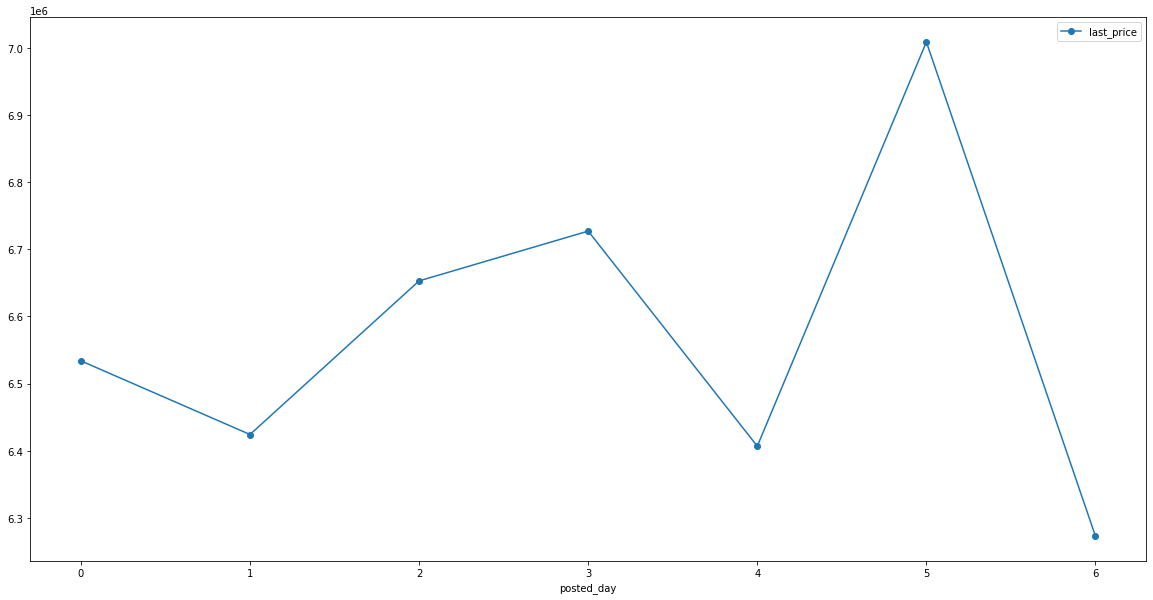

In [65]:
price_date_day = data.pivot_table(index='posted_day', values='last_price')
price_date_day.plot(style='o-',figsize=(20, 10))

__Conclusion__: Prices increase towards the end of the week.

<AxesSubplot:xlabel='posted_month'>

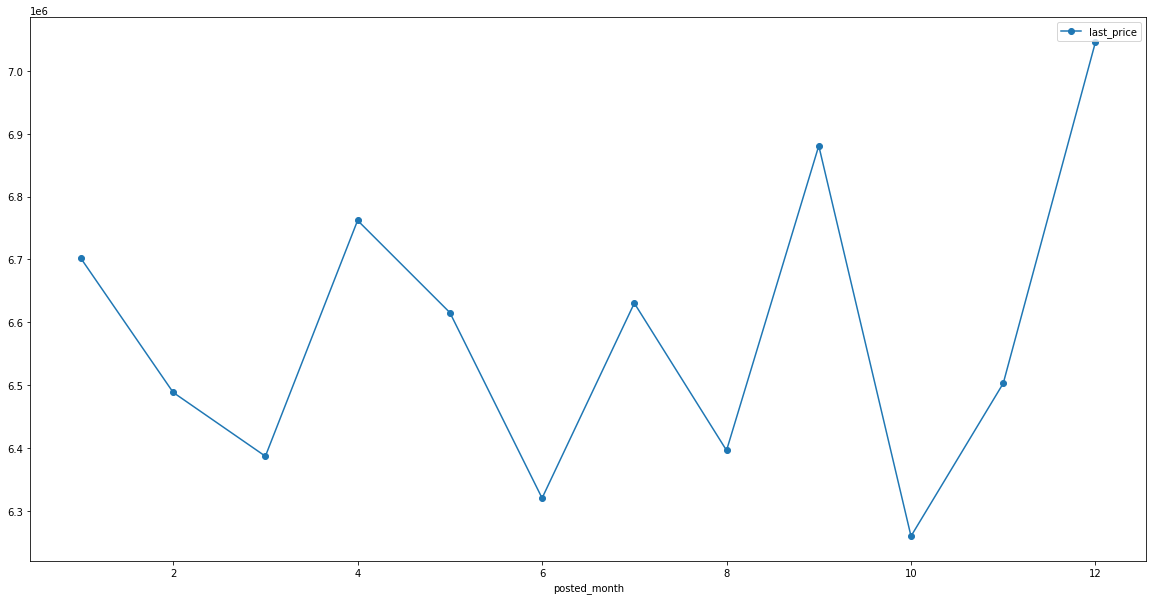

In [66]:
price_date_month = data.pivot_table(index='posted_month', values='last_price')
price_date_month.plot(style='o-',figsize=(20, 10))

__Conclusion__: Prices fluctuate throughout the year, but there is an increase towards the end of the year.

<AxesSubplot:xlabel='posted_year'>

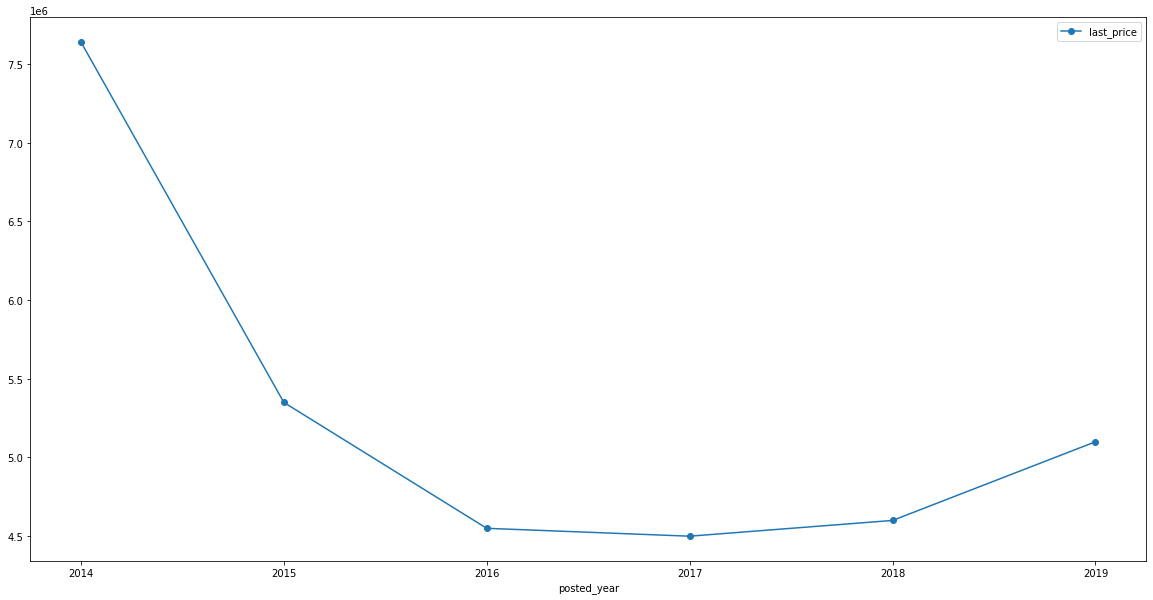

In [67]:
price_date_year = data.pivot_table(index='posted_year', values='last_price', aggfunc='median')
price_date_year.plot(style='o-',figsize=(20, 10))

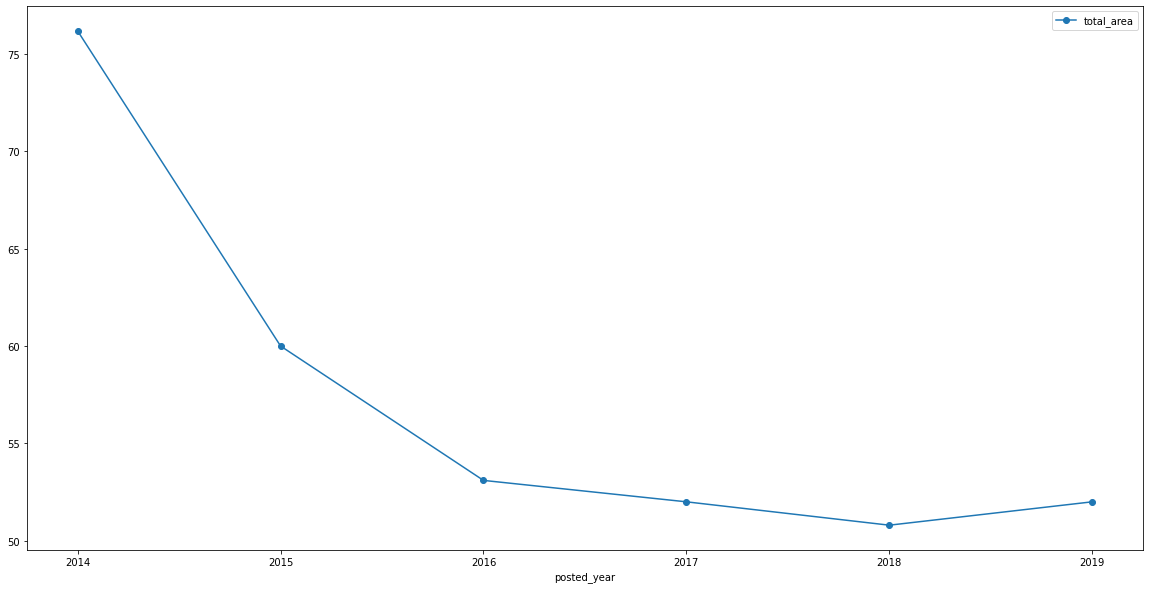

In [68]:
price_date_year = data.pivot_table(index='posted_year', values=['total_area'], aggfunc='median')
price_date_year.plot(style='o-',figsize=(20, 10))
plt.show()

__Conclusion__: Judging by the fact that starting from 2014 not only the price but also the overall average area of sold apartments decreased, it can be assumed that this had a greater impact on the average price, namely the decrease in the average total area of sold apartments.

Calculation of the average price per square meter of real estate depending on the location:

In [69]:
local_sq_price = data.pivot_table(index='locality_name', values='square_price', aggfunc=['count','median'])
local_sq_price.sort_values(by=('count','square_price'), ascending=False).head(10)

,count,median
,square_price,square_price
locality_name,,
Санкт-Петербург,15610,104650.0
Мурино,562,84801.0
Кудрово,451,95348.0
Шушары,436,76747.5
Всеволожск,392,65789.0
Пушкин,369,100000.0
Колпино,338,74723.5
Парголово,323,91917.0


__Conclusion__: The highest price per square meter is in St. Petersburg, and the lowest price per square meter is in Vyborg.

Calculating the cost of a square meter depending on the distance from the city center.

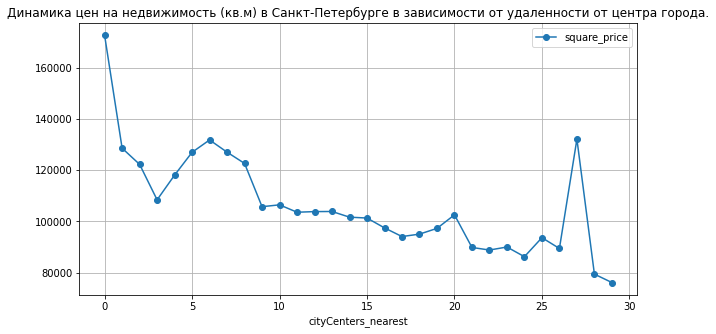

In [70]:
distance_sq_price = data.query('locality_name == "Санкт-Петербург"')
distance_sq_price = distance_sq_price.pivot_table(index='cityCenters_nearest', values='square_price', aggfunc='median')
distance_sq_price.plot(style='o-', grid=True, figsize=(10, 5), title = 'Динамика цен на недвижимость (кв.м) в Санкт-Петербурге в зависимости от удаленности от центра города.');

__Conclusion__: The highest price per square meter is observed in the immediate vicinity of the city center. Then the price gradually decreases. However, at a distance of about 3 kilometers from the center, prices begin to rise, and then after the 6th kilometer, they decrease again.

### General conclusion.

__General conclusion__: At the data preprocessing stage, a number of rows with missing values were identified.

- In the number of balconies, empty values were replaced with zero, based on the assumption that if the owner did not explicitly specify the number of balconies, there probably are none.
- In the ceiling height, there were many not only empty values but also explicit "outliers," for example, ceilings with a height of 6 meters or more, up to 100. Therefore, all values less than 2 meters were set to 2 meters. More than 4 were processed in a special way and either set to the median value or 4 meters.
- In the number of floors, all missing values and outliers were set to group values according to the following logic: missing values in the 'floors_total' column were replaced with a group of values 9, 16, 24, and 35 according to the following logic: if the value in the 'floor' column is less than 9, the building is considered 9-story, if more than 9 but less than 16 - 16-story, if more than 16 but less than 24 - 24-story, and if more than 24 floors, then the building is considered 35-story. Also, all rows with a floor value above 45 were discarded; according to data from Google, there are no such buildings in St. Petersburg.
- Missing values in the living area and kitchen area were calculated using the following formula. First, the median value of the ratio of area to total area was found, and then in all cells where the value was missing, it was obtained by multiplying the total area by the value of the median ratio to the total area.
- Data in apartments were filled with the value False based on the assumption that where the owner did not specify this parameter, he meant that it is not an apartment.
- In the locality cell, there were many both explicit and implicit duplicates. All keywords such as "settlement," "village," etc., were removed, leaving only the names, which allowed excluding all duplicates.
- Data in cells with distances have many missing values. It was decided not to replace them with anything since not all apartments, by definition, are within walking distance of ponds, airports, and the city center. All these values were brought to a common form, meters were converted to kilometers for the convenience of building graphs and summarizing tables.
- Zero values ​​from the number of rooms were removed; a total of 197 rows. With a total number of rows of more than 23 thousand, removing such a number of rows is not critical for analysis.
- All zero values ​​from the day of the announcement were dropped.
- Next, new columns were added to facilitate analysis:

    - price per square meter.
    - day of ad placement.
    - month of ad placement.
    - year of ad placement.
    - a column grouping floors by the feature - first, last, and other.
    - After evaluation and analysis, a number of dependencies were identified:

- The most important factor influencing the price per square meter of real estate in St. Petersburg and its surroundings is proximity to the city center. The maximum values ​​of the average price per square meter are on the segment from 1 to 5 kilometers.
- Other factors have much less correlation with the price per square meter. As the influence decreases - total area, floor of the apartment. The least impact on the price is the number of rooms and kitchen area.

__The ideal apartment for sale is one located close to the city center and located on the middle floor, namely not the first and not the last. Also, considering the trend of decreasing selling area, apartments with average and small areas sell better. Most of them were on the market at the end of 2019.__